<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_04_PROBLEM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT PACKAGES

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
# DRIVE MOUNT

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READ DATA FROM DRIVE

housing_data = pd.ExcelFile("/content/drive/MyDrive/Asssignment4_Data.xlsx")
train_df = pd.read_excel(housing_data, 'Train', index_col = 'House ID')
test_df = pd.read_excel(housing_data, 'Test', index_col = 'House ID')

In [ ]:
# PRINT TRAINING DATA

print(train_df)

          Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
House ID                                                                       
1              4.9176        1.0     3.4720        0.998        1.0        7   
2              5.0208        1.0     3.5310        1.500        2.0        7   
3              4.5429        1.0     2.2750        1.175        1.0        6   
4              4.5573        1.0     4.0500        1.232        1.0        6   
5              5.0597        1.0     4.4550        1.121        1.0        6   
6              3.8910        1.0     4.4550        0.988        1.0        6   
7              5.8980        1.0     5.8500        1.240        1.0        7   
8              5.6039        1.0     9.5200        1.501        0.0        6   
9             16.4202        2.5     9.8000        3.420        2.0       10   
10            14.4598        2.5    12.8000        3.000        2.0        9   
11             5.8282        1.0     6.4

In [ ]:
# PRINT TEST DATA

print(test_df)

          Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
House ID                                                                       
24             6.0931        1.5     6.7265        1.652        1.0        6   
25             8.3607        1.5     9.1500        1.777        2.0        8   
26             8.1400        1.0     8.0000        1.504        2.0        7   
27             9.1416        1.5     7.3262        1.831        1.5        8   
28            12.0000        1.5     5.0000        1.200        2.0        6   

          # Bedrooms  Age of home Construction type  
House ID                                             
24                 3           44         Apartment  
25                 4           48             House  
26                 3            3             House  
27                 4           31         Apartment  
28                 3           30         Apartment  


In [ ]:
# TRAIN AND TEST DATA SPLIT

train_df['Class'] = train_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
test_df['Class']  = test_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

x_train = train_df.iloc[:,:8] 
y_train = train_df['Class']

x_test = test_df.iloc[:,:8]
y_test = test_df['Class']

In [ ]:
# MODEL FIT USING THE TRAINING DATA

model = tree.DecisionTreeClassifier() 
model.fit(x_train, y_train)

DecisionTreeClassifier()

**PROBLEM 2.1.a**

ACCURACY OF TRAINING DATA.

In [ ]:
# PRINT TRAINING ACCURACY

y_train_predict = model.predict(x_train)
print("Training accuarcy is: ",accuracy_score(y_train, y_train_predict)*100)

Training accuarcy is:  100.0


We are getting training data accuracy 100% because, decision tree will memorize the training data and certainly overfit.

**PROBLEM 2.1.b**

ACCURACY OF TESTING DATA.

In [ ]:
# PRINT TESING ACCURACY

y_test_predict=model.predict(x_test)
print("Testing accuracy is: ",accuracy_score(y_test, y_test_predict)*100)

Testing accuracy is:  40.0


As the training data overfits, the testing data is getting very low accuracy as expected.

**PROBLEM 2.2**

EFFECT ON RESTRICTING THE MAXIMUM DEPTH OF THE TREE.

In [ ]:
for i in range(1,5):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_predict)*100
    print('Accuracy on Train data: ' + str(train_acc)+' with depth '+str(i))
    y_test_predict = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_predict)*100
    print('Accuracy on Test data: ' + str(test_acc)+' with depth '+str(i))

Accuracy on Train data: 55.00000000000001 with depth 1
Accuracy on Test data: 40.0 with depth 1
Accuracy on Train data: 70.0 with depth 2
Accuracy on Test data: 80.0 with depth 2
Accuracy on Train data: 80.0 with depth 3
Accuracy on Test data: 60.0 with depth 3
Accuracy on Train data: 95.0 with depth 4
Accuracy on Test data: 40.0 with depth 4


**PROBLEM 2.3**

From the result, it is seen that there is a strong effect of depth on the classification performance. As the depth increases, the accuracy of the Decision Tree classifier decreases. It is because, decision tree memorizes the training data and these data normally contains noise. Hence for the test data, the classifer model overfits. 

So, as the depth grows, the accuracy on the test data decreases.

**PROBLEM 2.4**

Visualization of the decision tree.

[Text(0.5454545454545454, 0.9, 'X[7] <= 36.0\nentropy = 1.581\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.2727272727272727, 0.7, 'X[0] <= 8.411\nentropy = 1.371\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.18181818181818182, 0.5, 'X[0] <= 5.894\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.2727272727272727, 0.3, 'X[2] <= 6.093\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.18181818181818182, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.36363636363636365, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8181818181818182, 0.7, 'X[7] <= 59.0\nentropy = 1.361\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.7272727272727273, 0.5, 'X[2] <= 5.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(0.6363636363636364, 0.3, 'X[0] <= 4.55\nentropy = 0.863\nsamples = 7\nvalue = 

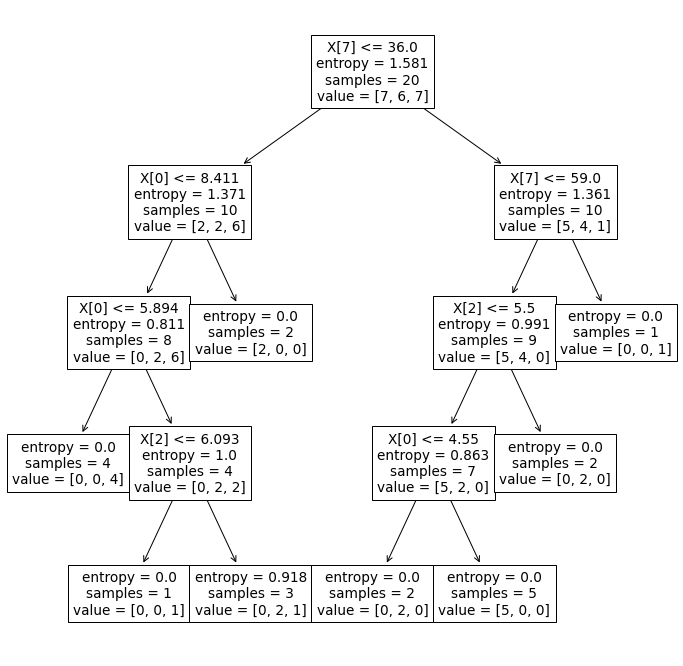

In [ ]:
# VISUALIZATION OF THE TREE

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
tree.plot_tree(model)

In [ ]:
# TEST CASE INITIALIZATION

test_case = {"Local Price": [9.0384], "Bathrooms": [1], "Land Area": [7.8], "Living area": [1.5], "# Garages": [1.5], "# Rooms": [7], "# Bedrooms": [3], "Age of home": [23]}

In [ ]:
# PREDICTION OF THE GIVEN DATA

Given_Data = pd.DataFrame(test_case)
print(Given_Data)

y_example_predict = model.predict(Given_Data)
print("Predicted class for example data: " + str(y_example_predict))

   Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0       9.0384          1        7.8          1.5        1.5        7   

   # Bedrooms  Age of home  
0           3           23  
Predicted class for example data: [0]


So, the prediction from the map is '**Apartment**'.

From the root, the afe of the home is 23, that is less than 36.

In depth 2, the Local Price is 9.0384, that is greater than 8.411.

In depth 3, the prediction is 'Apartment' with entropy 0.